In [1]:
import pandas as pd
import os, os.path
import matplotlib.pyplot as plt

# Dataset preparation

In [2]:
dataset_initial = pd.read_csv('../dataset/dataset.csv')
dataset_initial = dataset_initial.drop(['imageUrl','pdfUrl'], axis = 1)
dataset_initial = dataset_initial.set_index('_id')
dataset_initial.head()

,speciesName,taxonomicFamily,commonName
_id,,,
1,Atheris broadleyi,Viperidae,Broadley's bush viper
2,Atheris chlorechis,Viperidae,West African bush viper
6,Atractaspis fallax,Atractaspididae,False burrowing asp
4,Atractaspis andersonii,Atractaspididae,Anderson's mole viper
3,Atheris squamigera,Viperidae,Variable bush viper


In [3]:
dataset_dir = '../dataset/images/{}/'
sample_counts = []
sample_ids = []
for i in range(1,239):
    try:
        current_derectory = dataset_dir.format(i)
        count = len([name for name in os.listdir(current_derectory) if os.path.isfile(os.path.join(current_derectory, name))])
        sample_counts.append(count)
        sample_ids.append(i)
    except FileNotFoundError:
        print('Directory not found for {}'.format(i))
sample_count_pd = pd.DataFrame({'_id':sample_ids, 'sample_count': sample_counts})
sample_count_pd = sample_count_pd.set_index('_id')
sample_count_pd.head()

Directory not found for 98


,sample_count
_id,
1,2
2,2
3,4
4,0
5,2


In [4]:
dataset = pd.merge(dataset_initial, sample_count_pd, on="_id")
dataset.head()

,speciesName,taxonomicFamily,commonName,sample_count
_id,,,,
1,Atheris broadleyi,Viperidae,Broadley's bush viper,2
2,Atheris chlorechis,Viperidae,West African bush viper,2
6,Atractaspis fallax,Atractaspididae,False burrowing asp,2
4,Atractaspis andersonii,Atractaspididae,Anderson's mole viper,0
3,Atheris squamigera,Viperidae,Variable bush viper,4


In [5]:
print(dataset.shape)

counts_hist = dataset['sample_count'].value_counts().sort_index()
counts_hist

(237, 4)


0     44
1     47
2     62
3     34
4     24
5     13
6      9
7      2
8      1
16     1
Name: sample_count, dtype: int64

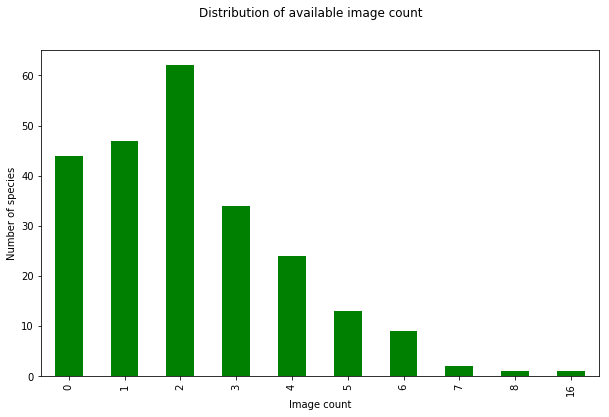

In [12]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Image count')
plt.ylabel('Number of species')
plt.suptitle('Distribution of available image count')
counts_hist.plot.bar(color='green')